# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 1. Cвойства и сравнение оценок
### Мягкий дедлайн --- 6 октября 23:59
### Жёсткий дедлайн --- 12 октября 16:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [72]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [75]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Ставится задача изучить способы оценивания параметра $\theta$ семейства распределений $U[0, \theta]$. В данной задаче Вы численно смоделируете оценки параметра $\theta$ и сделаете вывод о том, какую оценку стоит применить на практике.

Сгенерируйте $N$ выборок $X_1, \dots, X_N$ размера $N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$ и $\theta = 2$.

In [76]:
N = 1e4  # use this
N = int(N)
K_NUMBER = 5
TET=2

sample = sps.uniform.rvs(loc=0, scale=TET, size=(N,N))

Для всех $N$ выборок посчитайте оценки параметра $\theta$: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

In [77]:
estimations = np.empty((K_NUMBER, N))
 #[1, 2, 3, 4, 5]

estimations[0] = 2 * sample.mean(axis=1)

estimations[1] = sample.mean(axis=1) + sample.max(axis=1) / 2

estimations[2] = (N + 1) * sample.min(axis=1)

estimations[3] = sample.min(axis=1) + sample.max(axis=1)

estimations[4] = (N + 1) / N * sample.max(axis=1)

При помощи моделирования выясните, какие оценки точнее, чем другие.

Для этого прикиньте распределение каждой из оценок. Какая оценка предпочтительнее? Почему?

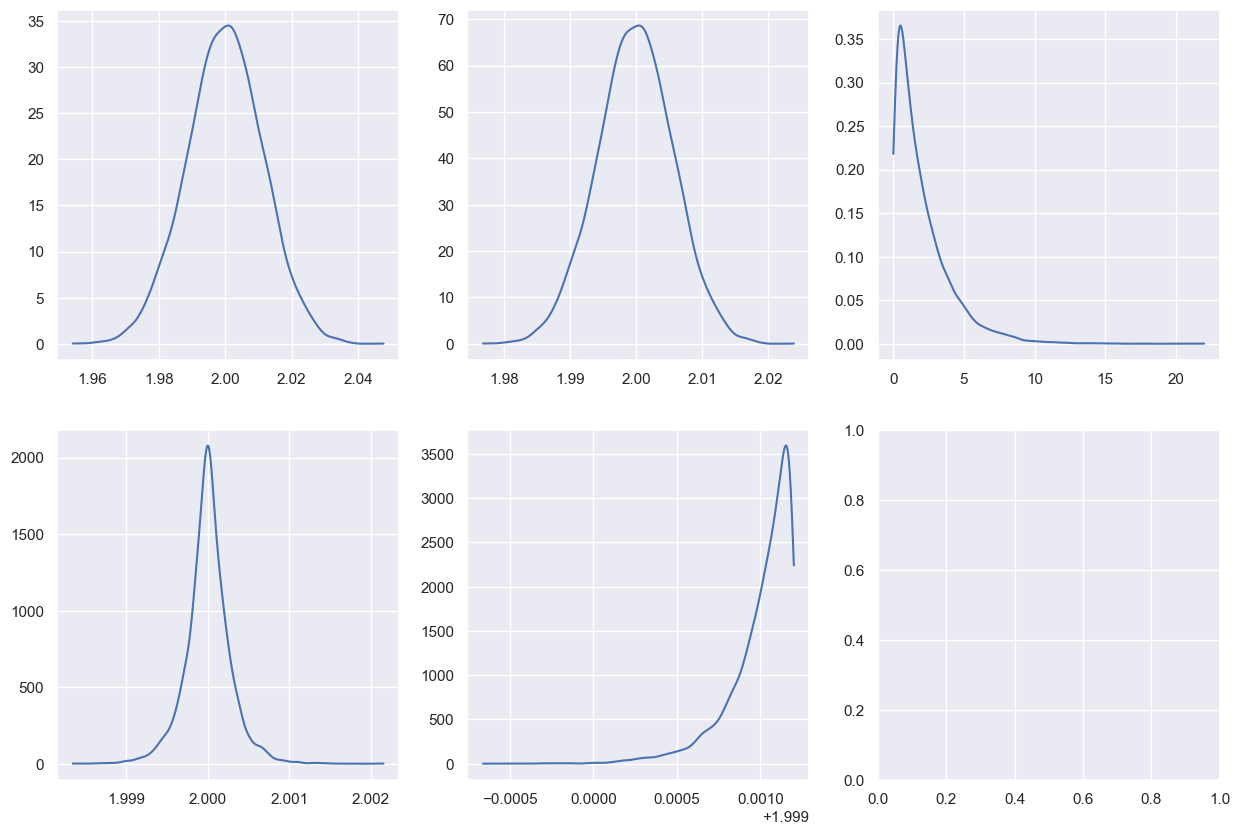

In [78]:
kernels = []
fig, axe = plt.subplots(2, 3, figsize = (15, 10))

for i, loc in enumerate(axe.flat):
    if i == 5:
        break
    x = np.linspace(min(estimations[i]), max(estimations[i]), 1000)
    kernels.append(sps.gaussian_kde(estimations[i]))
    loc.plot(x, kernels[i](x))
plt.show()



Как меняется распределение каждой оценки с ростом параметра? Постройте оценки не только по выборкам, но и по их префиксам. В качестве размера префикса возьмите хотя бы 4 значения, меньших N.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Изучите оценки на состоятельность и нормальность. Сравните скорости сходимости.

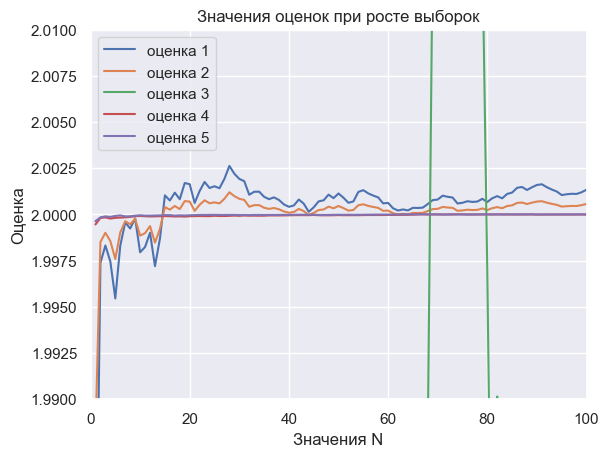

In [79]:
plt.ylim(1.99, 2.01)
plt.xlim(0, 100)
for i, est in enumerate(estimations):
    X = np.cumsum(est) / np.arange(1, N+1)
    plt.plot(np.arange(1, N+1), X, label=f"оценка {i + 1}")

plt.title("Значения оценок при росте выборок")
plt.xlabel("Значения N")
plt.ylabel("Оценка")
plt.legend()
plt.show()


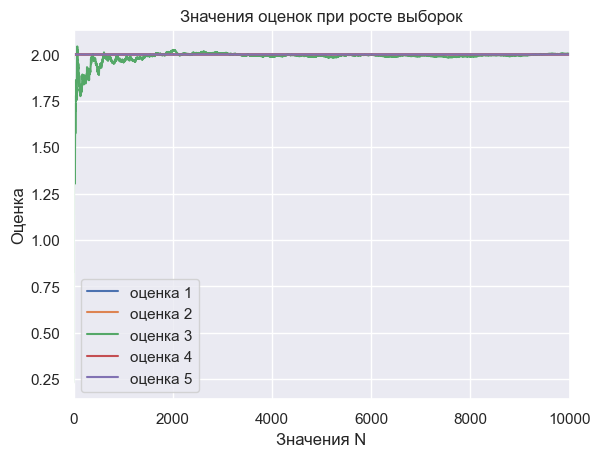

In [80]:
plt.xlim(0, 10000)
for i, est in enumerate(estimations):
    X = np.cumsum(est) / np.arange(1, N+1)
    plt.plot(np.arange(1, N+1), X, label=f"оценка {i + 1}")

plt.title("Значения оценок при росте выборок")
plt.xlabel("Значения N")
plt.ylabel("Оценка")
plt.legend()
plt.show()


Какая оценка получилась лучше? Как Вы это поняли? А что говорит теория? Стоит ли в данной ситуации сравнивать оценки для других значений параметра $\theta$?

__Ответ:__ лучше всех оказалась 5-я оценка $\frac{n+1}{n} X_{(n)}$, в теории все логично, ведь мы пытались оценить наш максимум (т.е $\theta$)


Сделайте вывод.


__Вывод:__ Мы выяснили что $\frac{n+1}{n} X_{(n)}$ отлично оценивает наш параметр.<br>
Cумма $X_{(1)}+X_{(n)}$ тоже очень хорошо приближает наш параметр ведь в нем участвует максимум выборки.<br>
$2\overline{X}, \; \overline{X} + X_{(n)}/ 2$ тоже неплохо приближают наш параметр при не сильно большой выборке(100-500).<br>
Хуже всех оценивает оценка $(n+1)X_{(1)}$, но при достаточно больших выборках (1000-5000) она может оценить наш параметр.

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

В этой задаче Вы научитесь подбирать гиперпараметр к семейству оценок. Как известно из основного курса статистики, для любого $k$ оценка  $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ является состоятельной и асимптотически нормальной. Но какой $k$ стоит выбрать?

Сгенерируйте $N$ выборок $X_1, ..., X_N$ размера $n$ из экспоненциального распределения с параметром $\lambda = 1$ для $N = n = 10^4$.

In [112]:
N = n = 10000
LAMBDA = 1
K_NUMBER = 10

In [113]:
sample = sps.expon.rvs(loc=0, scale=1 / LAMBDA, size=(N, n))


Для всех выборок посчитайте оценку $\widehat{\lambda}_k=(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\lambda$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [114]:
estimations = np.empty((K_NUMBER, n))
k_s = np.arange(1, K_NUMBER + 1)

for i in range(10):
    k_factorial = np.prod((np.arange(1, k_s[i] + 1)))
    X_moment_mean = ((sample**k_s[i])).mean(axis=0)
    estimations[i] = (k_factorial / X_moment_mean)**(1.0 /k_s[i])



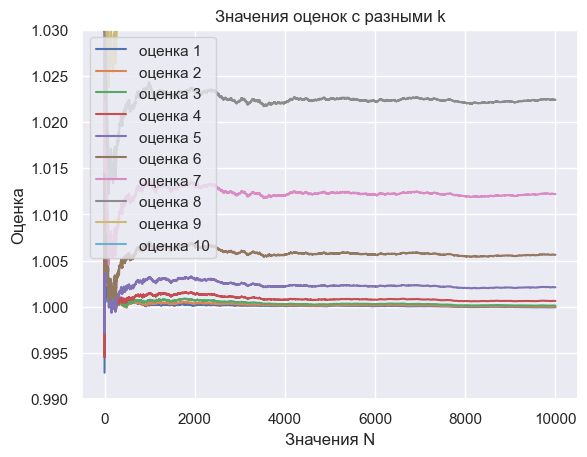

In [115]:
plt.ylim(0.99, 1.03)
for i, est in enumerate(estimations):
    X = np.cumsum(est) / np.arange(1, N+1)
    plt.plot(np.arange(1, N+1), X, label=f"оценка {i + 1}")

plt.title("Значения оценок с разными k")
plt.xlabel("Значения N")
plt.ylabel("Оценка")
plt.legend()
plt.show()


Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием -- постройте эмпирическую плотность распределения статистик $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$.

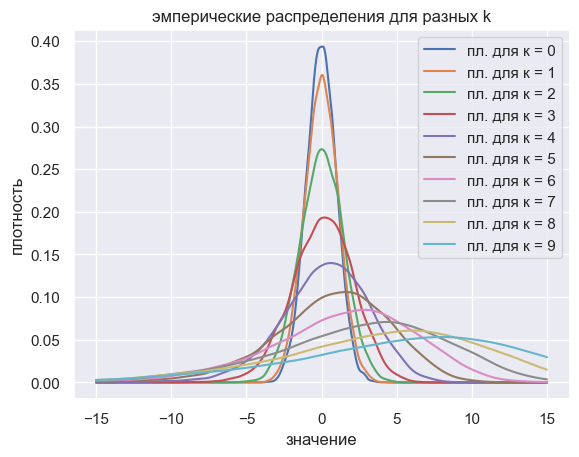

In [116]:
kernels = []
x = np.linspace(-15, 15, 10000)
for i, est in enumerate(estimations):
    kernel = sps.gaussian_kde(np.sqrt(n) * (est - 1/LAMBDA))
    plt.plot(x, kernel(x), label=f"пл. для к = {i}")

plt.title("эмперические распределения для разных k")
plt.xlabel("значение")
plt.ylabel("плотность")
plt.legend()
plt.show()



Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

In [139]:
variance = (estimations**2).mean(axis = 1) - (estimations.mean(axis = 1))**2

for i in variance:
    print(f"дисперсия = {np.round(i, 5)}")

дисперсия = 0.0001
дисперсия = 0.00012
дисперсия = 0.00021
дисперсия = 0.00042
дисперсия = 0.00088
дисперсия = 0.00166
дисперсия = 0.00273
дисперсия = 0.00398
дисперсия = 0.00533
дисперсия = 0.0067


На одном графике изобразите плотности распределений оценок для разных $k$ и на основе графика сделайте выбор параметра. Обоснуйте его.

Для одной выборки постройте графики $\left|\hat{\lambda}_k - \lambda\right|$ и сравните скорости сходимости к нулю при увеличении размера выборки.

Сделайте вывод.


__Вывод:__ в ходе иследования хотелось бы сказать что лучшим $k$ для наших оценок является 1, но при других лямбдах это не сработает, помимо 1 - хорошими вариантами являются остальные меньшие варианты $k$ типа {2, 3, 4, 5} оценки срабатывают хорошо, с ростом оценивание становится все хуже

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

В этой задаче Вам нужно показать на примере, как построение интуитивно понятной оценки без теоретического обоснования может дать неадекватный результат.

Ниже напишите, какое поведение Вы ожидаете от оценки среднего и медианы. Обоснуйте ожидания, ссылаясь на теоремы и задачи из курса теории вероятностей:

Ответ:

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства?

Проверьте свои теоретические ожидания, написанные в начале задачи. Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны.

Изучите поведение эмпирической дисперсии оценок среднего и медианы. Какая из них сходится? С какой скоростью? Для проверки постройте график какой-то детерминированной функции с такой же скоростью сходимости.

**Вывод:**

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Эта задача посвящена проверке теоремы Гливенко-Кантелли, как основного теоретического результата курса. Условия посмотрите в методичке или сходите на лекцию старшего магистра колдовства и чародейства Савёлова М.П.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ размера $N$ из стандартного нормального распределения для $N = 10^4$.

In [118]:
np.random.seed(42)

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [119]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdfs: typing.List[ECDF] = [ECDF(X.sample[:i]) for i in range(1, len(X) + 1)]

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

Для некоторых $n$ (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`) и сравните каждый из них с истинной функцией распределения (количество графиков равно количеству различных значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x \in \mathbb R}} | \hat{F}_n(x) - F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. Наблюдается ли сходимость их распределений на графиках?


Пища для ума: если Ваша эмпирическая плотность сходится к чему-то, то это не просто так! Поищите на просторах интернета, учебников и бесед с умными людьми, куда должна сходиться статистика $\sqrt{n}D_n$. Подумайте, для чего может быть полезен этот теоретический результат.

Ответ:

Сделайте вывод о важности теоремы Гливенко-Кантелли в численном анализе. Какие методы, применяемые Вами в других задачах неявно основываются на этой теореме?

**Вывод:**

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

В этой задаче Вам предлагается изучить инструмент QQ-plot и сделать на его основе выводы о равенстве распределений.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $\mathrm U{[0, \theta]}$ для $\theta=1$ размера $n=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

Указание: можно взять код и результаты из задачи 1. Просто скопируйте их сюда.

In [ ]:
N_samples = 400
n = 40

bins = [i / 40 + 0.8 for i in range(18)]

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $n$?

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Вспомните, чему равен коэффициент $\sigma^2(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} \mathcal N(0, 1).
$$

**Ответ**:

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}$$ для каждой выборки. Постройте её плотность теоретически и при помощи KDE.

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению, часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Изучите семинарский ноутбук ноль и постройте QQ-plot предложенной статистики и нормального распределения.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

Бонусная часть (+5 баллов): Если Вы нашли семейство распределений, которое по QQ-plot соответствует выборке, то докажите строго, что $n(\theta^* - \theta)$ сходится к нему. Заметьте, что это утверждение от асимптотической нормальности отличается только заменой $\sqrt{n}$ на $n$. Такие оценки называются **сверхнормальными**. В конце доказательства поясните:

- как множитель, зависящий от $n$, связан с скоростью сходимости оценки на практике?
- лучше ли сверхномальная оценка, чем нормальная оценка?

**Решение:**

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

Не забудьте перезапустить с нуля весь ноутбук перед отправкой! Удачи.